In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day35-complete-case-analysis/data_science_job.csv')

In [2]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
null_data_percentage = (df.isnull().sum()/len(df)) * 100

In [13]:
cols = null_data_percentage[null_data_percentage < 5].index

In [14]:
df[cols].head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,36.0,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15.0,47.0,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5.0,83.0,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,0.0,52.0,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,20.0,8.0,0.0


In [15]:
# remove rows from data

new_df = df[cols].dropna()

len(new_df)/len(df) * 100
# removing all null rows give us 89% of data

89.68577095730244

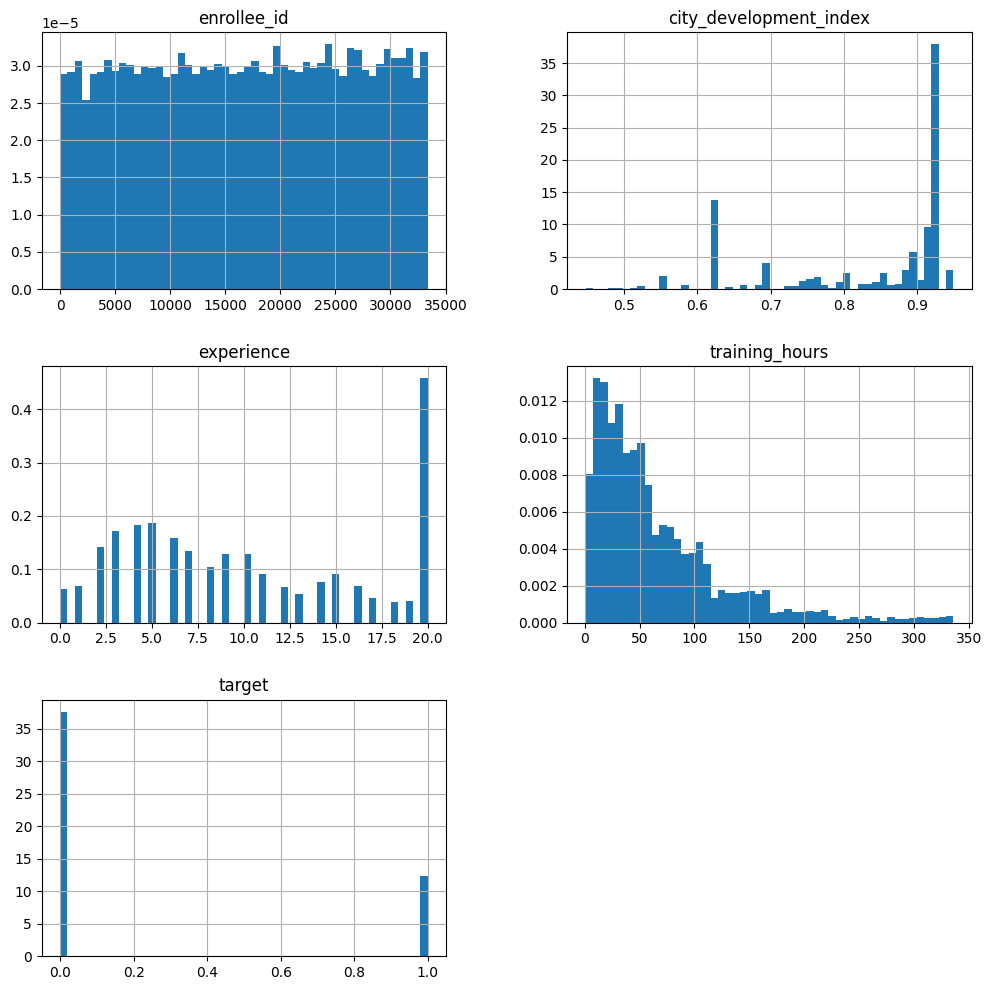

In [17]:
import matplotlib.pyplot as plt

new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

In [18]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
